<a href="https://colab.research.google.com/github/bobchomba7/Bob-Weights-and-Biases/blob/main/Weights_%26_Biases_Bob_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb scikit-plot
!pip install wandb
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

# For inline plots
%matplotlib inline


In [ ]:
!wandb login
wandb.init(project="Bob_Phishing_URL")
config = wandb.config
config.learning_rate = 0.01
config.epochs = 10

wandb: Currently logged in as: bobchomba15 (bobchomba15-usiu). Use `wandb login --relogin` to force relogin


In [ ]:
# Load the dataset into new variable
bob = pd.read_csv('/content/drive/MyDrive/urlset.csv', encoding='latin-1', on_bad_lines='skip')
bob.head()
bob.shape

bob.sample(50)
bob.info()

bob.describe(include='all')
bob.columns

bob.isnull().sum()

<ipython-input-35-898389a92a71>:2: DtypeWarning: Columns (1,2,3,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  bob = pd.read_csv('/content/drive/MyDrive/urlset.csv', encoding='latin-1', on_bad_lines='skip')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96005 entries, 0 to 96004
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   domain         96005 non-null  object 
 1   ranking        95953 non-null  object 
 2   mld_res        95935 non-null  object 
 3   mld.ps_res     95924 non-null  object 
 4   card_rem       95923 non-null  float64
 5   ratio_Rrem     95923 non-null  float64
 6   ratio_Arem     95923 non-null  float64
 7   jaccard_RR     95922 non-null  float64
 8   jaccard_RA     95921 non-null  float64
 9   jaccard_AR     95920 non-null  float64
 10  jaccard_AA     95919 non-null  float64
 11  jaccard_ARrd   95919 non-null  object 
 12  jaccard_ARrem  95917 non-null  object 
 13  label          95913 non-null  float64
dtypes: float64(8), object(6)
memory usage: 10.3+ MB


domain            0
ranking          52
mld_res          70
mld.ps_res       81
card_rem         82
ratio_Rrem       82
ratio_Arem       82
jaccard_RR       83
jaccard_RA       84
jaccard_AR       85
jaccard_AA       86
jaccard_ARrd     86
jaccard_ARrem    88
label            92
dtype: int64

In [ ]:
# Prepare the features and target variables
X = bob.drop(columns=['label', 'domain'])
y = bob['label']

# Convert object columns to numeric if possible
for col in X.columns:
    if X[col].dtype == 'object':
        try:
            X[col] = pd.to_numeric(X[col], errors='coerce')
        except:
            pass
X.fillna(X.mean(), inplace=True)
X.isnull().sum()

# Handle target variable
for i in range(len(y)):
    if y.dtype == 'object':
        try:
            y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')
        except:
            pass
y.fillna(y.mean(), inplace=True)
y.isnull().sum()


0

<Axes: >

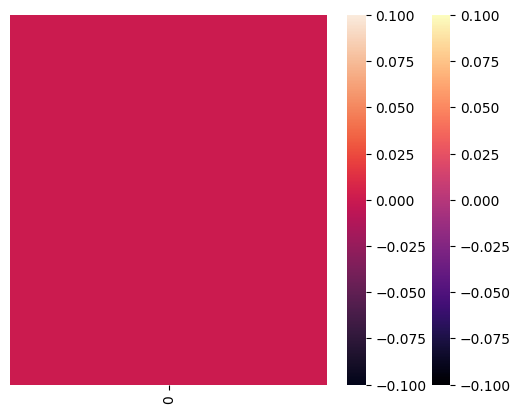

In [ ]:
# Visualize missing values with 'viridis' color map
sns.heatmap(X.isnull(),yticklabels=False,cbar=True,cmap='magma')
sns.heatmap(y.isnull().values.reshape(-1, 1), yticklabels=False, cbar=True, cmap='rocket')



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



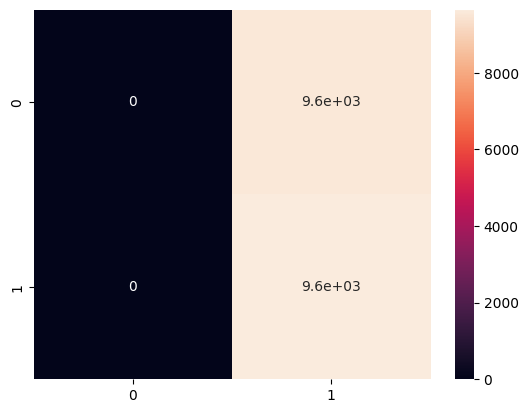

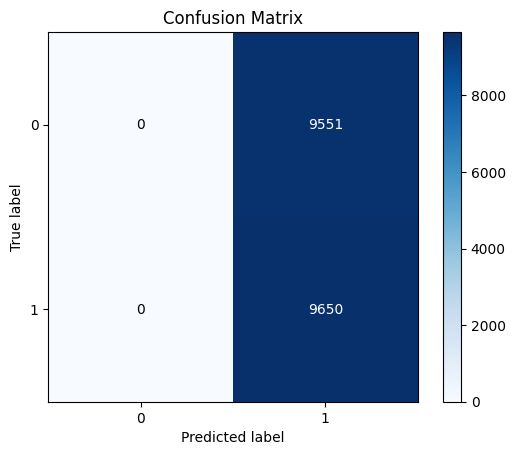

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


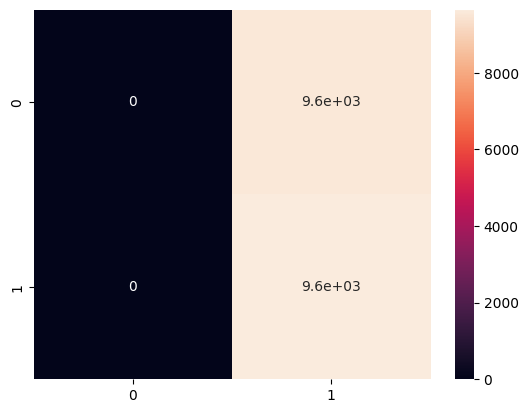

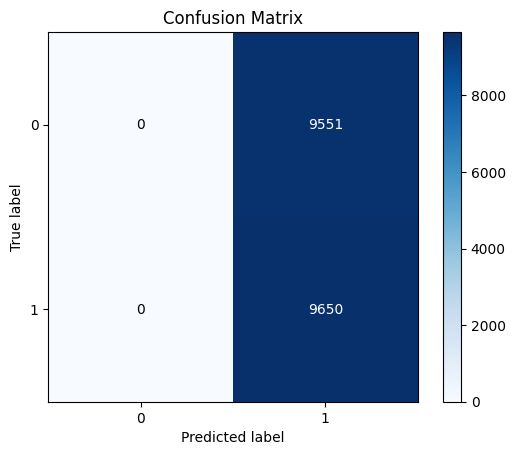

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


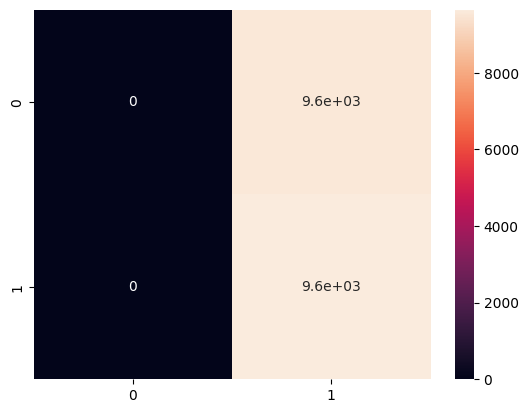

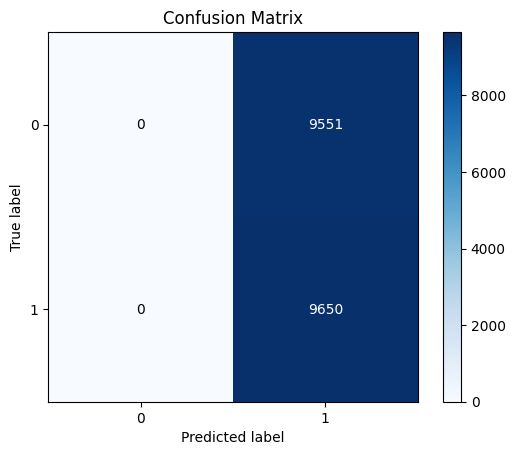

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



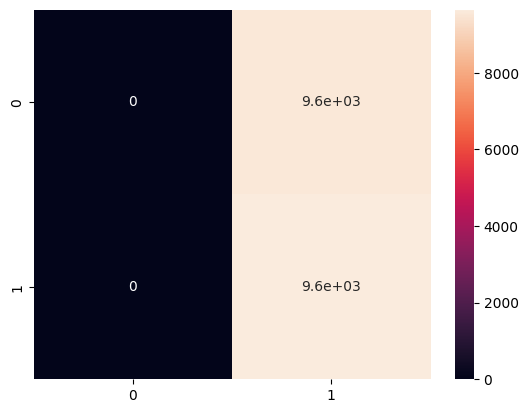

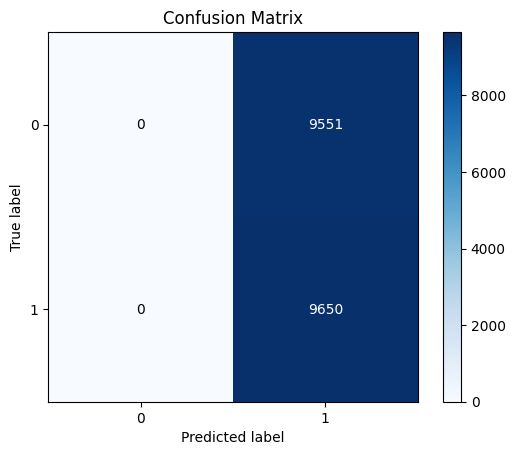

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



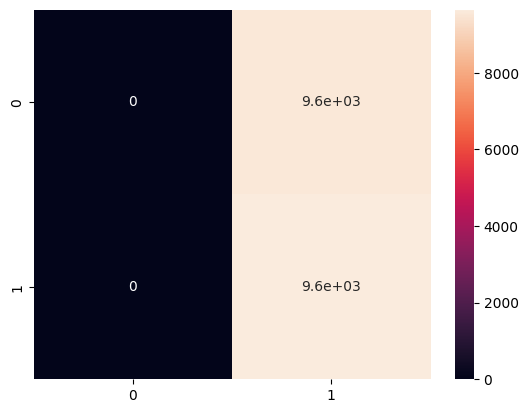

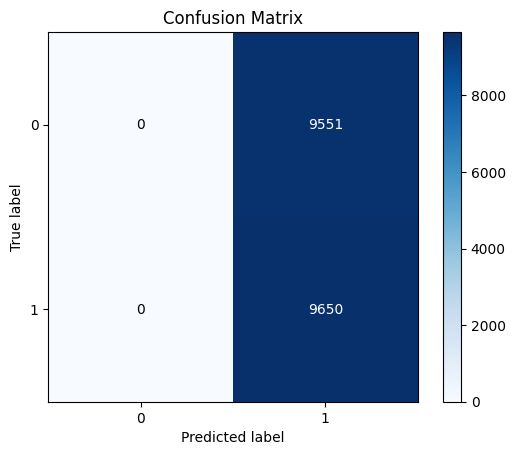

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



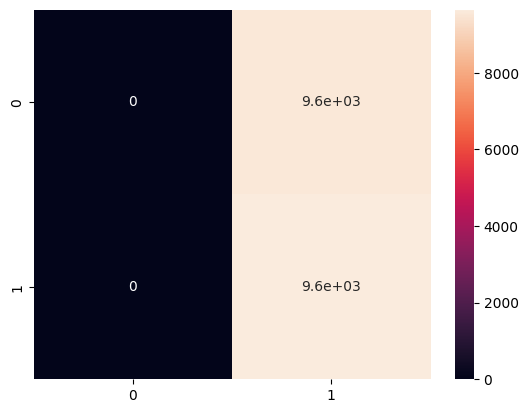

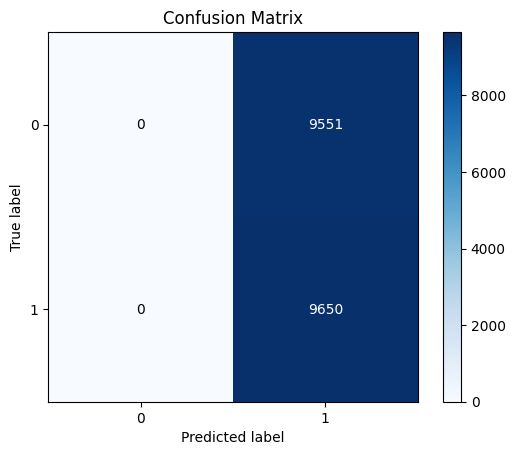

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



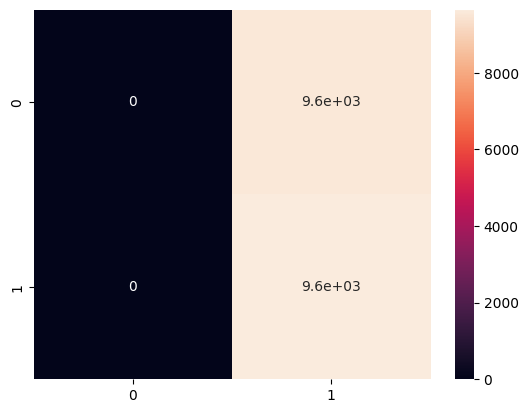

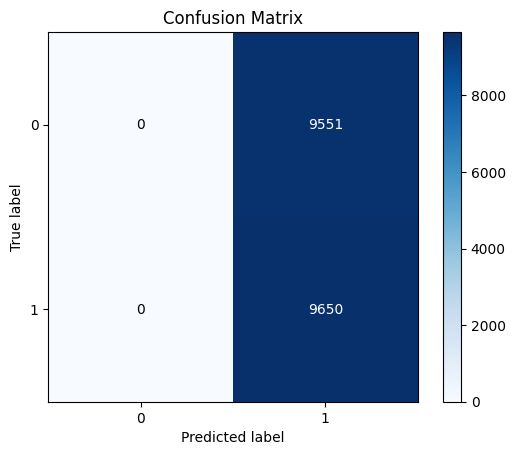

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


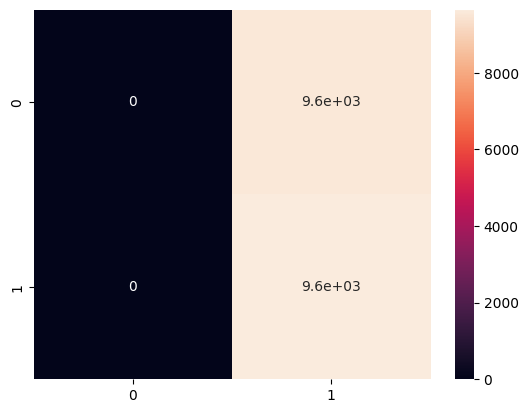

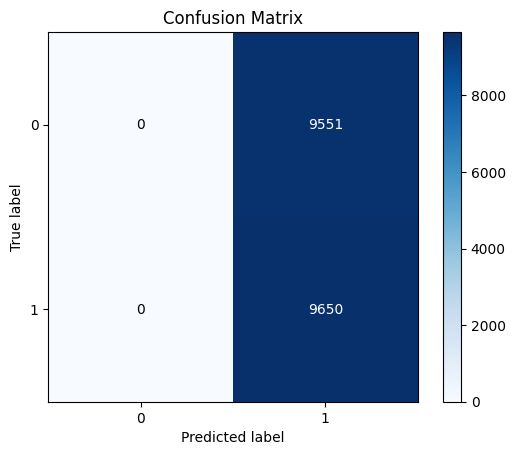

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


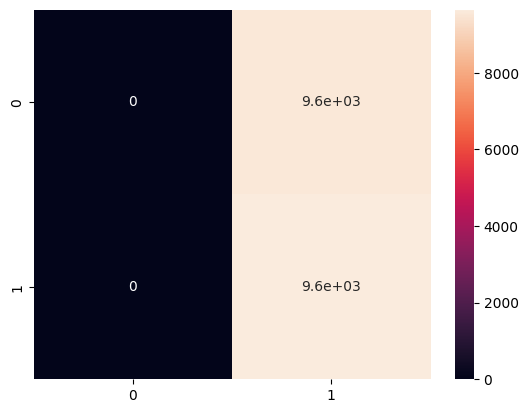

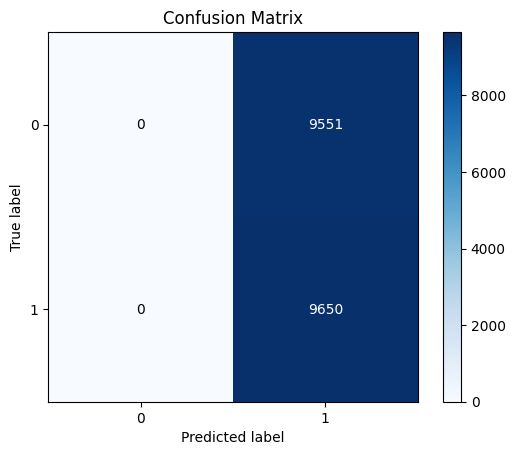

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


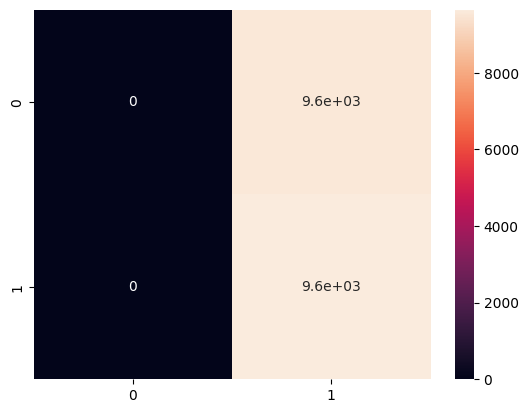

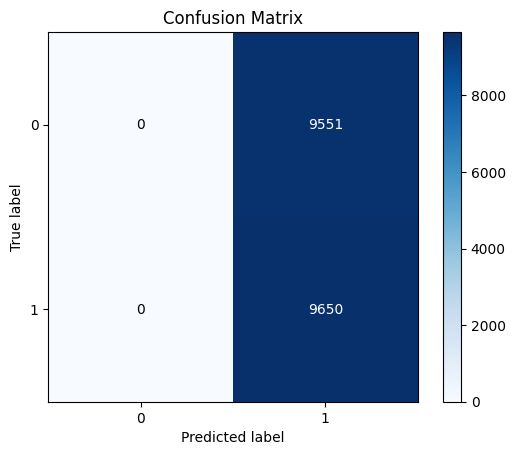

Train Accuracy: 0.49813811780636424
Test Accuracy: 0.5025779907296495
Test AUC: 0.5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
for epoch in range(config.epochs):
    logmodel = LogisticRegression()
    threshold = 0.5  # Choose a threshold that makes sense for your data
    y_train = (y_train > threshold).astype(int)
    y_test = (y_test > threshold).astype(int)  # Convert y_test to binary
    logmodel.fit(X_train, y_train)
    prediction = logmodel.predict(X_test)

    # Evaluate the model
    print(classification_report(y_test, prediction))
    sns.heatmap(confusion_matrix(y_test, prediction), annot=True)

    # Plot confusion matrix using scikit-plot
    skplt.metrics.plot_confusion_matrix(y_test, prediction)
    plt.show()

    train_accuracy = accuracy_score(y_train, logmodel.predict(X_train))
    test_accuracy = accuracy_score(y_test, prediction)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)

    test_auc = roc_auc_score(y_test, prediction)
    print("Test AUC:", test_auc)

    # Log metrics to wandb
    wandb.log({
        'epoch': epoch + 1,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'test_auc': test_auc
    })


In [ ]:
wandb.finish()


epoch,▁▂▃▃▄▅▆▆▇█
test_accuracy,▁▁▁▁▁▁▁▁▁▁
test_auc,▁▁▁▁▁▁▁▁▁▁
train_accuracy,▁▁▁▁▁▁▁▁▁▁
epoch,10
test_accuracy,0.50258
test_auc,0.5
train_accuracy,0.49814
